In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
print(KNN.predict(sc.transform([[30,87000]])))


[0]


In [46]:
y_pred = KNN.predict(X_test)


In [47]:
y_pred.shape

(100,)

In [48]:
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
print(accuracy_score(y_pred,y_test))

[[50  4]
 [ 8 38]]
0.88


In [51]:
#Visualizing the KNN on train examples

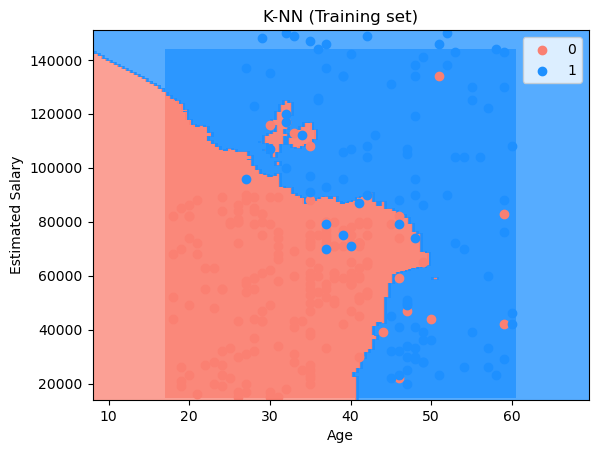

In [63]:

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, KNN.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors = ['#FA8072', '#1E90FF']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#visualizing the KNN on test examples

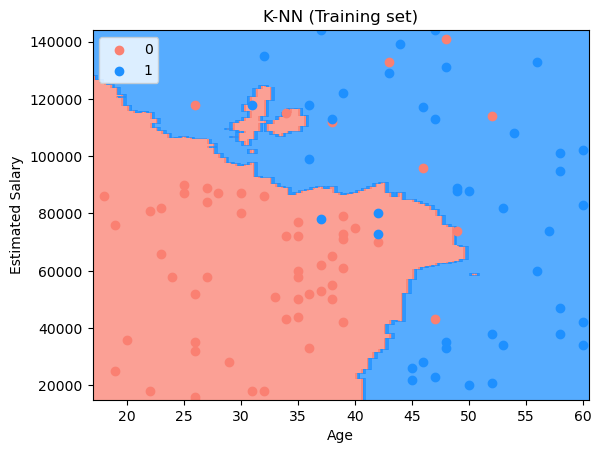

In [65]:
from matplotlib.colors import ListedColormap
X_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(
    np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.5),
    np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.5)
)
plt.contourf(X1,X2, KNN.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),alpha=0.75,
             cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
colors = ['#FA8072', '#1E90FF']
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],color = colors[i], label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()